<a href="https://colab.research.google.com/github/Shakshi3104/ARASHI/blob/master/ARASHI_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import urllib.request
from io import StringIO

# Loading data

## read_csv from URL

In [ ]:
def read_csv_from_URL(url):
    print(url)
    res = urllib.request.urlopen(url)
    res = res.read().decode("utf-8")
    df = pd.read_csv(StringIO(res))
    return df

## data class

In [ ]:
class arashi():
    def __init__(self, url):
        self.release_songs_list = [2, 6, 13, 15, 18, 19, 12, 18, 22, 23, 11, 25, 
                                   17, 18, 16, 21, 27, 19, 24, 14, 3]
        self.data = read_csv_from_URL(url)

## loading

In [ ]:
url = "https://raw.githubusercontent.com/Shakshi3104/ARASHI/master/ARASHI_20191205.csv"
dataset = arashi(url)

https://raw.githubusercontent.com/Shakshi3104/ARASHI/master/ARASHI_20191205.csv


In [ ]:
dataset.data

,Title,Year,Count,Rap,Release,Solo
0,a Day in Our Life,2002,148,0,0,0
1,A・RA・SHI,1999,262,0,0,0
2,Asterisk,2014,163,1,2,0
3,Attack it!,2009,258,1,2,0
4,Believe,2009,163,1,0,0
...,...,...,...,...,...,...
88,秘密,2005,42,0,2,1
89,風の向こうへ,2008,89,1,0,0
90,抱擁,2017,33,0,2,0
91,迷宮ラブソング,2011,279,0,0,0


# Analysis

In [ ]:
scores = pd.DataFrame()

In [ ]:
scores["Score"] = [0 for _ in range(len(dataset.release_songs_list))]
scores["Weighted Score"] = [0 for _ in range(len(dataset.release_songs_list))]
scores["Rap Score"] = [0 for _ in range(len(dataset.release_songs_list))]
scores["No Rap Score"] = [0 for _ in range(len(dataset.release_songs_list))]
scores["Weighted Rap Score"] = [0 for _ in range(len(dataset.release_songs_list))]
scores["Weighted No Rap Score"] = [0 for _ in range(len(dataset.release_songs_list))]
scores["Without Solo Score"] = [0 for _ in range(len(dataset.release_songs_list))]
scores["Weighted Without Solo Score"] = [0 for _ in range(len(dataset.release_songs_list))]

In [ ]:
for i in range(1999, 2020):
    j = i - 1999
    w = (j + 1) / 9 # 重み

    c = dataset.data[dataset.data["Year"] == i] # i年のリリースされた曲

    score = (len(c) / dataset.release_songs_list[j]) * sum(c["Count"])
    scores.iloc[j, 0] = score # Score
    scores.iloc[j, 1] = w * score # Weighted Score
    
    score = (len(c) / dataset.release_songs_list[j]) * sum(c["Rap"] * c["Count"])
    scores.iloc[j, 2] = score # Rap Score
    scores.iloc[j, 4] = w * score # Weighted Rap Score
    
    score = (len(c) / dataset.release_songs_list[j]) * sum((1.0 - c["Rap"]) * c["Count"])
    scores.iloc[j, 3] = score # No Rap Score
    scores.iloc[j, 5] = w * score # Weighted No Rap Score

    score = (len(c) / dataset.release_songs_list[j]) * sum((1.0 - c["Solo"]) * c["Count"])
    scores.iloc[j, 6] = score # Without Solo Score
    scores.iloc[j, 7] = w * score # Weighted Without Solo Score


In [ ]:
scores

,Score,Weighted Score,Rap Score,No Rap Score,Weighted Rap Score,Weighted No Rap Score,Without Solo Score,Weighted Without Solo Score
0,131.000000,14.555556,0.000000,131.000000,0.000000,14.555556,131.000000,14.555556
1,15.000000,3.333333,0.000000,15.000000,0.000000,3.333333,15.000000,3.333333
2,16.923077,5.641026,0.000000,16.923077,0.000000,5.641026,16.923077,5.641026
3,9.866667,4.385185,0.000000,9.866667,0.000000,4.385185,9.866667,4.385185
4,46.000000,25.555556,16.666667,29.333333,9.259259,16.296296,46.000000,25.555556
5,47.526316,31.684211,28.105263,19.421053,18.736842,12.947368,47.526316,31.684211
6,349.500000,271.833333,311.500000,38.000000,242.277778,29.555556,328.500000,255.500000
7,168.666667,149.925926,111.777778,56.888889,99.358025,50.567901,168.666667,149.925926
8,377.090909,377.090909,229.454545,147.636364,229.454545,147.636364,377.090909,377.090909
9,205.826087,228.695652,137.478261,68.347826,152.753623,75.942029,196.956522,218.840580


## 5年ごとに集約

In [ ]:
scores_5 = pd.DataFrame()

scores_5["Score"] = [0 for _ in range(4)]
scores_5["Weighted Score"] = [0 for _ in range(4)]
scores_5["Rap Score"] = [0 for _ in range(4)]
scores_5["No Rap Score"] = [0 for _ in range(4)]
scores_5["Weighted Rap Score"] = [0 for _ in range(4)]
scores_5["Weighted No Rap Score"] = [0 for _ in range(4)]
scores_5["Without Solo Score"] = [0 for _ in range(4)]
scores_5["Weighted Without Solo Score"] = [0 for _ in range(4)]

In [ ]:
for j in range(4):
    n = len(scores) // 4
    b = 0

    if j == 3:
        b = 1
     
    for k in range(len(scores.columns)):
        scores_5.iloc[j, k] = sum(scores.iloc[n*j:n*j+n+b, k])

scores_5

,Score,Weighted Score,Rap Score,No Rap Score,Weighted Rap Score,Weighted No Rap Score,Without Solo Score,Weighted Without Solo Score
0,218.789744,53.470655,16.666667,202.123077,9.259259,44.211396,218.789744,53.470655
1,1148.609979,1059.230031,818.315847,330.294131,742.580813,316.649218,1118.740413,1033.041625
2,2334.898601,3192.789662,1211.367282,1123.531319,1661.865501,1530.924161,1961.769712,2691.086946
3,572.830688,1112.595532,151.619605,421.211083,296.444383,816.151149,572.830688,1112.595532


## Min-Max Normalization

In [ ]:
scores = (scores - scores.min()) / (scores.max() - scores.min())
scores.insert(0, "Year", range(1999, 2020))
scores = scores.set_index("Year")
scores

,Score,Weighted Score,Rap Score,No Rap Score,Weighted Rap Score,Weighted No Rap Score,Without Solo Score,Weighted Without Solo Score
Year,,,,,,,,
1999,0.080239,0.005391,0.000000,0.158765,0.000000,0.013230,0.103855,0.006973
2000,0.005777,0.000000,0.000000,0.018179,0.000000,0.003030,0.007478,0.000000
2001,0.007012,0.001109,0.000000,0.020510,0.000000,0.005127,0.009075,0.001434
2002,0.002482,0.000505,0.000000,0.011958,0.000000,0.003986,0.003213,0.000654
2003,0.025677,0.010675,0.022562,0.035550,0.009401,0.014813,0.033234,0.013807
2004,0.026656,0.013619,0.038046,0.023537,0.019023,0.011769,0.034502,0.017615
2005,0.220498,0.128976,0.421675,0.046054,0.245977,0.026865,0.267946,0.156677
2006,0.104418,0.070417,0.151313,0.068946,0.100875,0.045964,0.135150,0.091081
2007,0.238209,0.179537,0.310611,0.178927,0.232958,0.134195,0.308317,0.232224


In [ ]:
scores_5 = (scores_5 - scores_5.min()) / (scores_5.max() - scores_5.min())
scores_5.insert(0, "Year", ["1999-2003", "2004-2008", "2009-2013", "2014-2019"])
scores_5 = scores_5.set_index("Year")
scores_5

,Score,Weighted Score,Rap Score,No Rap Score,Weighted Rap Score,Weighted No Rap Score,Without Solo Score,Weighted Without Solo Score
Year,,,,,,,,
1999-2003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2004-2008,0.439401,0.320375,0.671004,0.139103,0.443736,0.183248,0.516329,0.371385
2009-2013,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2014-2019,0.167308,0.337374,0.112960,0.237775,0.173777,0.519226,0.203124,0.401546


# Visualization

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

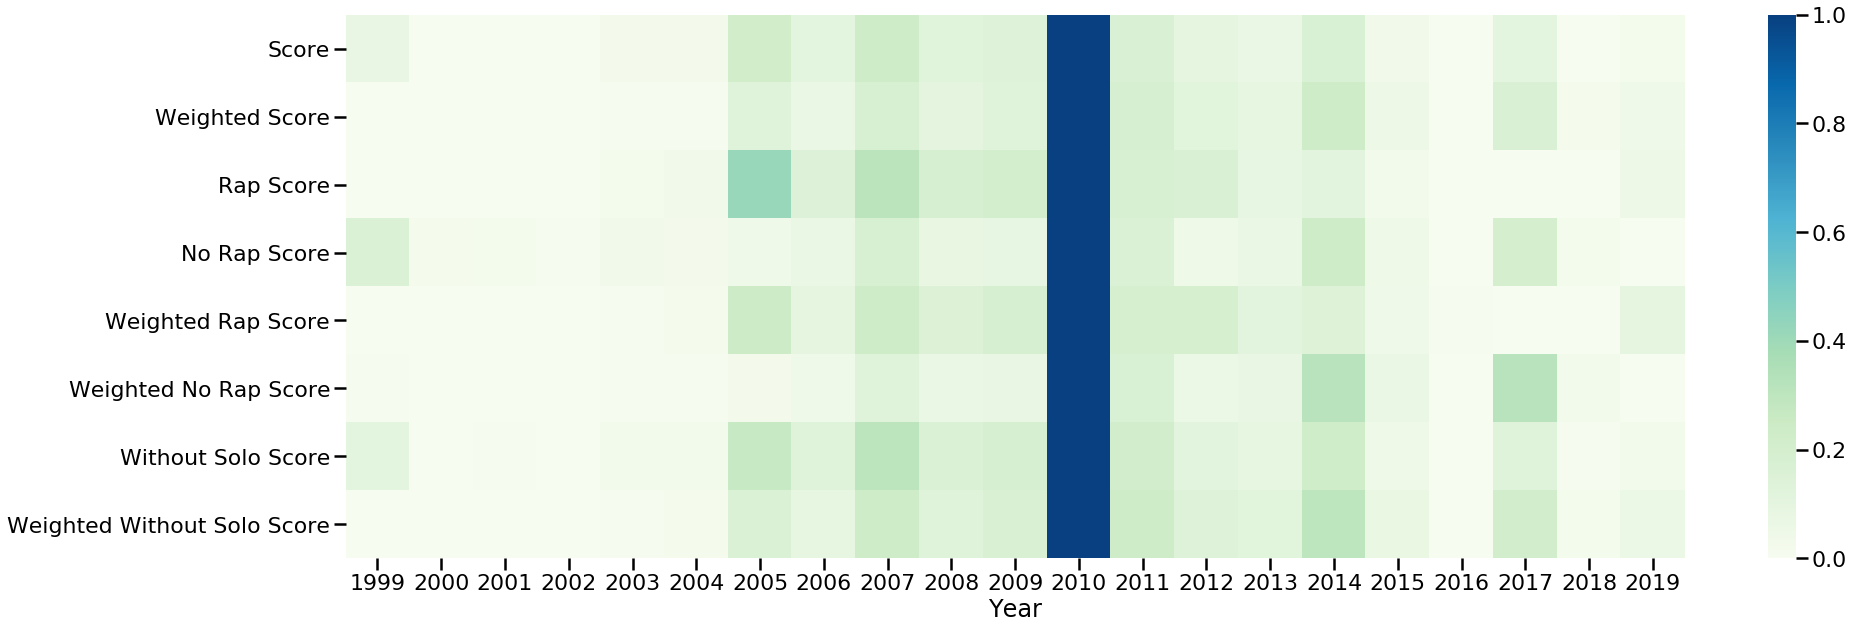

In [ ]:
sns.set_context("poster")

plt.figure(figsize=(30, 10))
sns.heatmap(scores.T, cmap="GnBu")
plt.savefig("arashi_analysis.png", bbox_inches="tight")

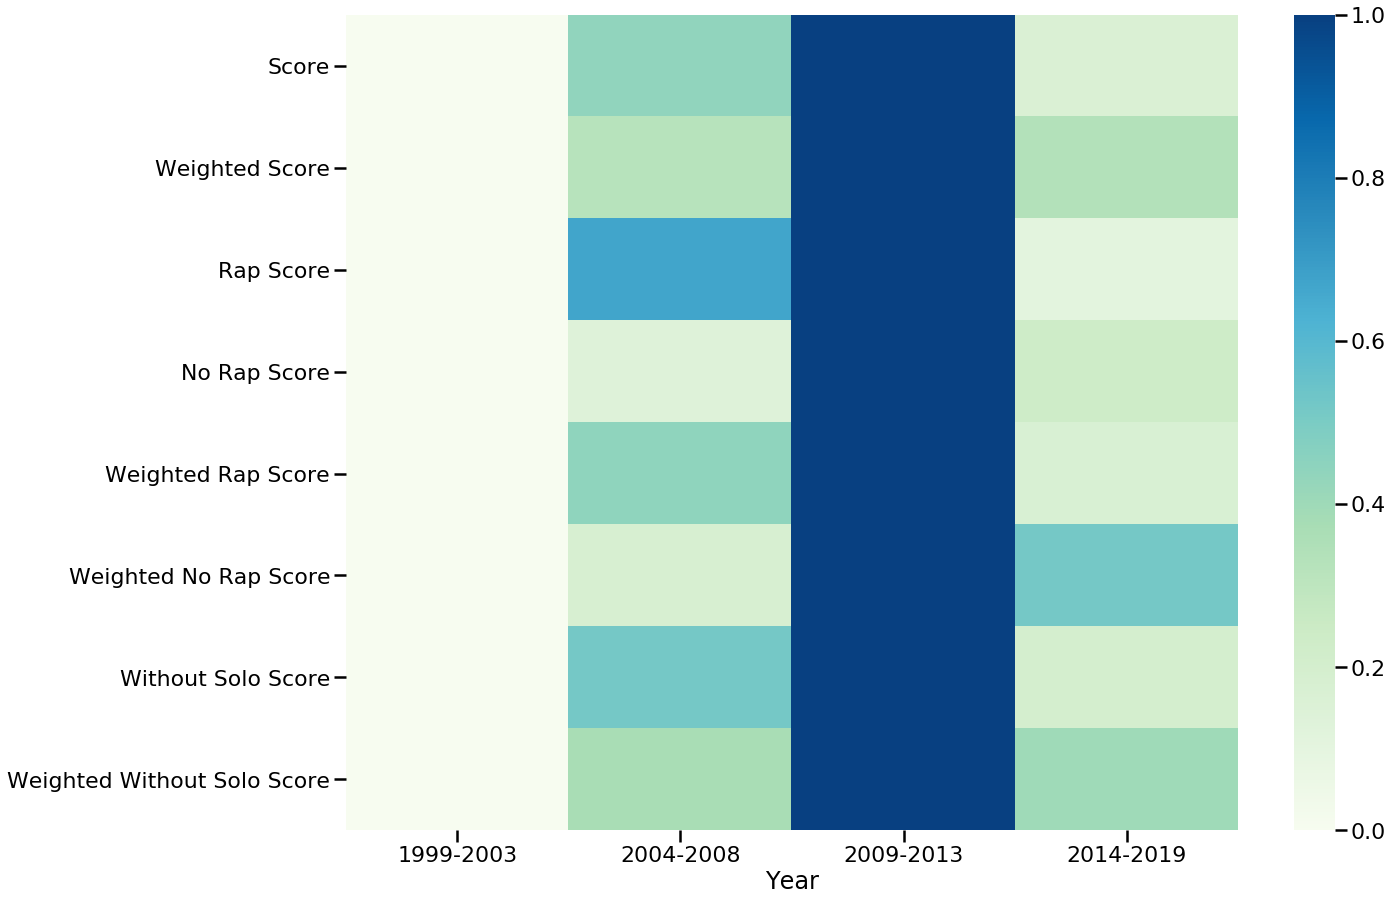

In [ ]:
sns.set_context("poster")

plt.figure(figsize=(20, 15))
sns.heatmap(scores_5.T, cmap="GnBu")
plt.savefig("arashi_analysis_5.png", bbox_inches="tight")